In [2]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from hyperopt import fmin, tpe, hp
import ipynb.fs.full.utils as utils
import ipynb.fs.full.features as features
import ipynb.fs.full.features_distancias as f_distancias


df_train = pd.read_csv('./data/train_filtrado.csv')
# Para usarse con el submit a Kaggle
df_eval = pd.read_csv('./data/test.csv')

df_train, df_eval = features.features_de_csvs(df_train, df_eval)

df_train_idf = pd.read_csv('./data/train_idf.csv')
df_eval_idf = pd.read_csv('./data/test_idf.csv')

df_train = pd.merge(df_train, df_train_idf, on= 'id', how= 'left')
df_eval = pd.merge(df_eval, df_eval_idf, on= 'id', how= 'left')

# Randoms solo para asegurarse que los features esten bien hechos
# df_train = df_train.sample(frac=1).reset_index(drop=True)
# df_train = utils.dolarizar_df(df_train)
# df_train = df_train.sample(frac=1).reset_index(drop=True)

df_train, df_test = utils.dividir_df_testeo(df_train, test_size=0.4)

df_test = features.llenar_nulls(df_test, hgb_mean=True, df_fill=df_train)
df_train = features.llenar_nulls(df_train, hgb_mean=True)


# df_train = df_train.sample(frac=1).reset_index(drop=True)
# df_test = utils.pesificar_df(df_test)
# df_train = df_train.sample(frac=1).reset_index(drop=True)


In [4]:
# df_train = df_train.sample(frac=1).reset_index(drop=True)
df_train_f = features.features_independientes_precio(df_train)
df_train_f = features.features_dependientes_precio(df_train_f, df_train)

# df_train_f = features.columna_a_ohe(df_train_f, 'tipodepropiedad', N=100, df_aux=df_test)
# df_train_f = features.columna_a_ohe(df_train_f, 'provincia', N=100, df_aux=df_test)
# df_train_f = features.columna_a_ohe(df_train_f, 'zona', df_aux=df_test_f)

df_train_f = f_distancias.feature_distancias(df_train_f)
df_train_f = features.agregar_clustering(df_train_f)


In [18]:
df_corr1 = df_train_f[['precio', 'similares_count', 'idf_titulo','idf_descripcion','peso_titulo', 'peso_descripcion',
 'metrostotales_log', 'metroscubiertos_log', 'porcentaje_metros', 'diferencia_metros', 'promedio_metros_totales_provincia', 'promedio_metros_cubiertos_provincia',
 'promedio_metros_tipo_propiedad', 'promedio_metros_cub_tipo_propiedad','tam_ambientes']]
    
df_corr2 = df_train_f[['precio', 'es_ciudad_centrica', 'escomercial', 'tipo_propiedad_compartida','promedio_precio_booleanos',
 'escualas_centros_cercanos', 'delincuencia', 'turismo', 'es_antigua',  'anio', 'mes', 'dia', 'trimestre', 'dias_desde_datos', 'meses_desde_datos',
 'promedio_por_mes', 'varianza_por_mes']]
 
df_corr3 = df_train_f[['precio', 'promedio_precio_tipo_propiedad_ciudad', 'count_tipo_propiedad_ciudad',
 'promedio_precio_hbg_tipo_propiedad_provincia','lat_norm', 'lng_norm', 
  'distancia_ciudad_centrica', 'distancia_centro_mexico', 'distancia_ciudad_cara']]

df_corr4 = df_train_f[['precio', 'cantidad_inquilinos', 'kmeans_basicos',
 'kmeans_superficie', 'kmeans_metroscubiertos', 'kmeans_fechas', 'kmeans_latlng', 
 'promedio_precio_habitaciones_banos_garages','puntaje']]


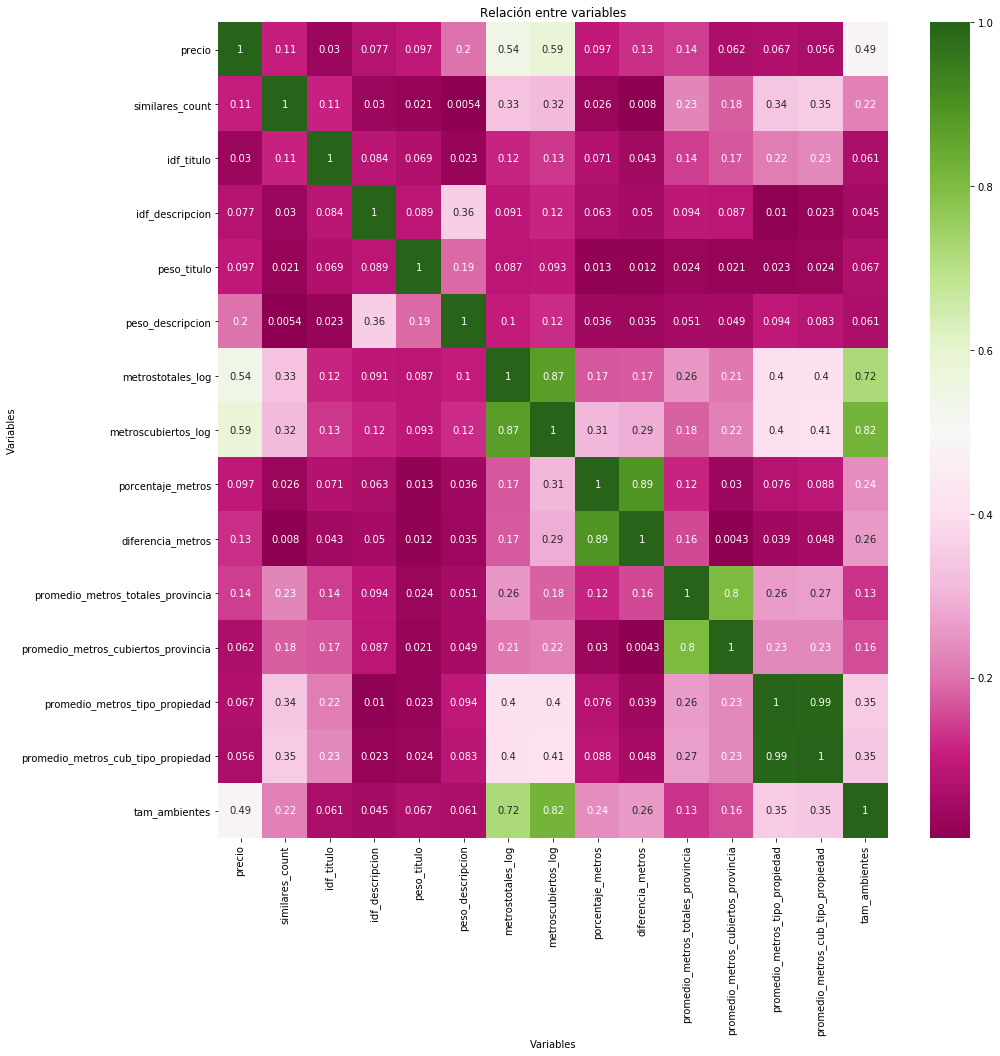

In [19]:
import matplotlib.pylab as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
cor = df_corr1.corr().abs()

sns.heatmap(cor,cmap='PiYG',  annot= True);
ax.axes.set_title("Relación entre variables")
ax.set_xlabel("Variables")
ax.set_ylabel("Variables")
ax.tick_params(labelsize=10)


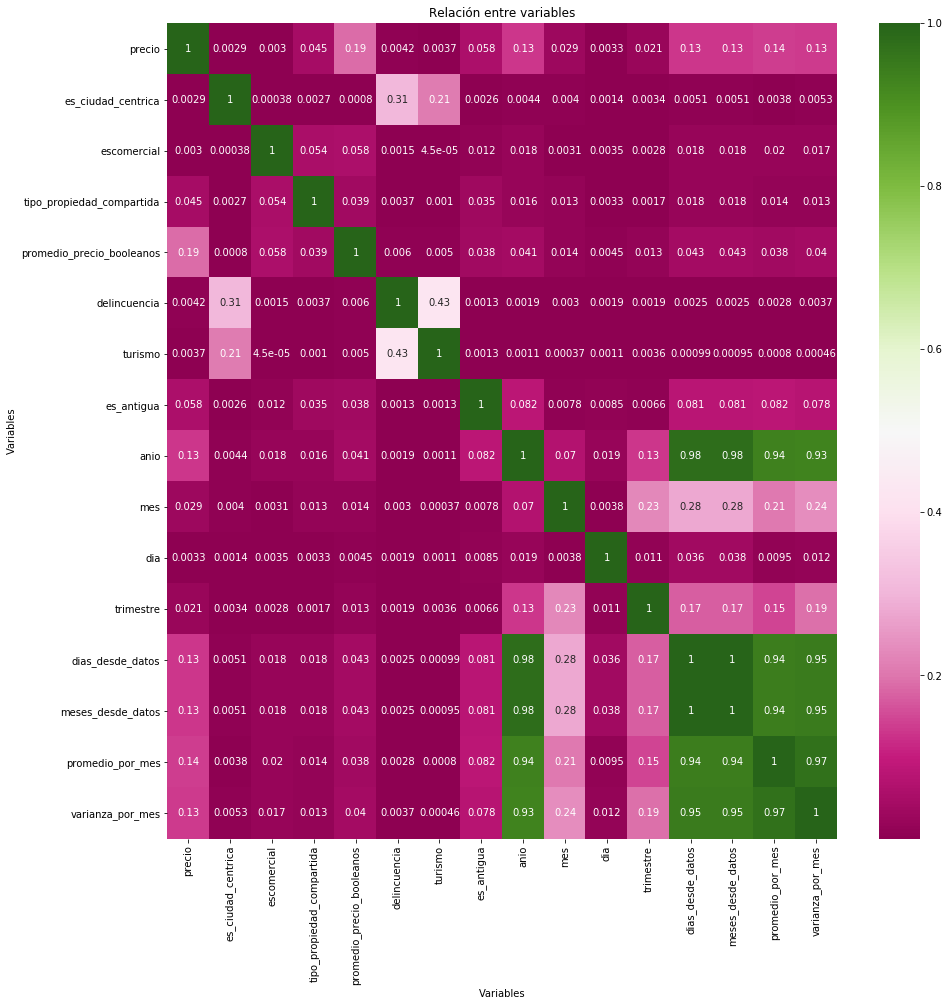

In [20]:
import matplotlib.pylab as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
cor = df_corr2.corr().abs()

sns.heatmap(cor,cmap='PiYG',  annot= True);
ax.axes.set_title("Relación entre variables")
ax.set_xlabel("Variables")
ax.set_ylabel("Variables")
ax.tick_params(labelsize=10)


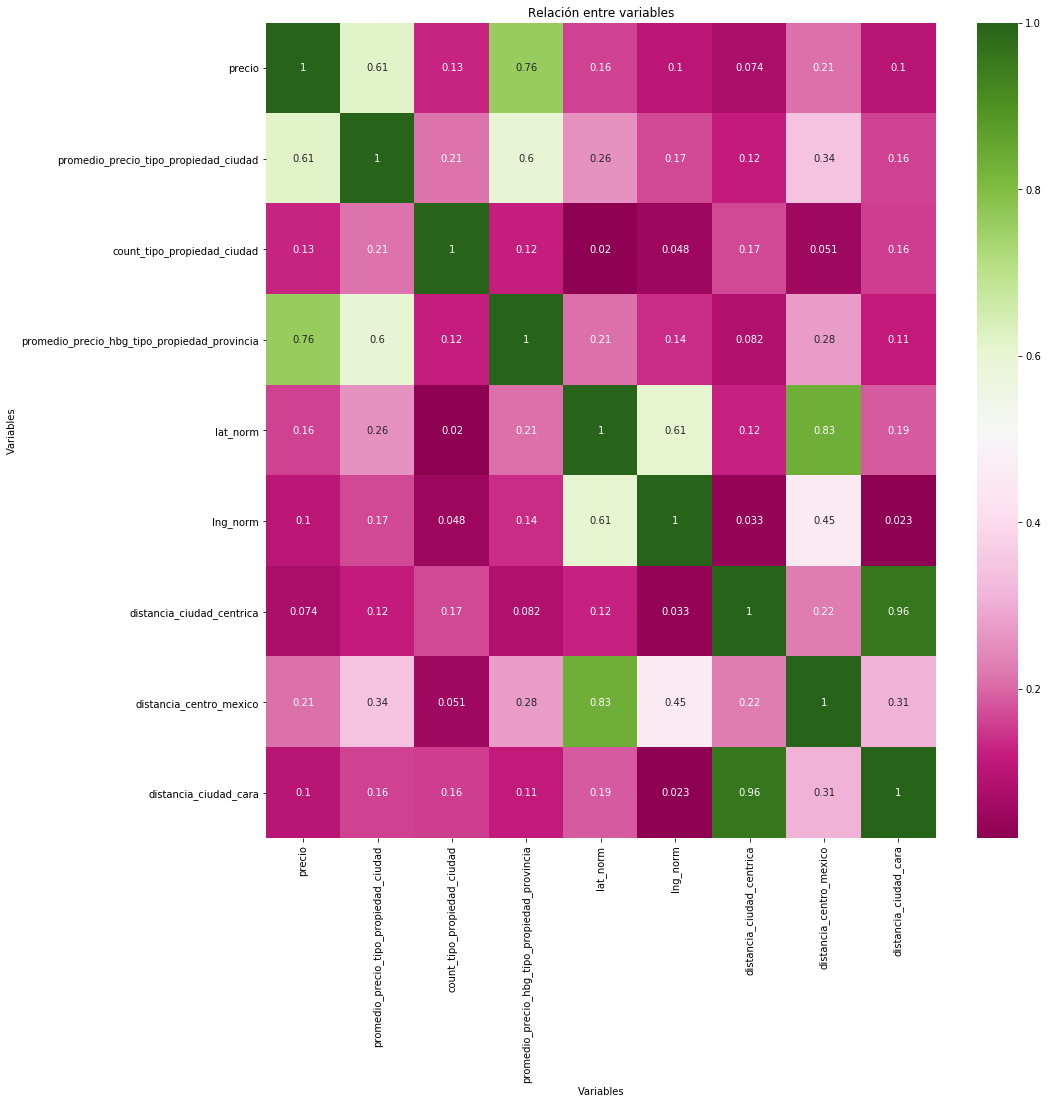

In [21]:
import matplotlib.pylab as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
cor = df_corr3.corr().abs()

sns.heatmap(cor,cmap='PiYG',  annot= True);
ax.axes.set_title("Relación entre variables")
ax.set_xlabel("Variables")
ax.set_ylabel("Variables")
ax.tick_params(labelsize=10)


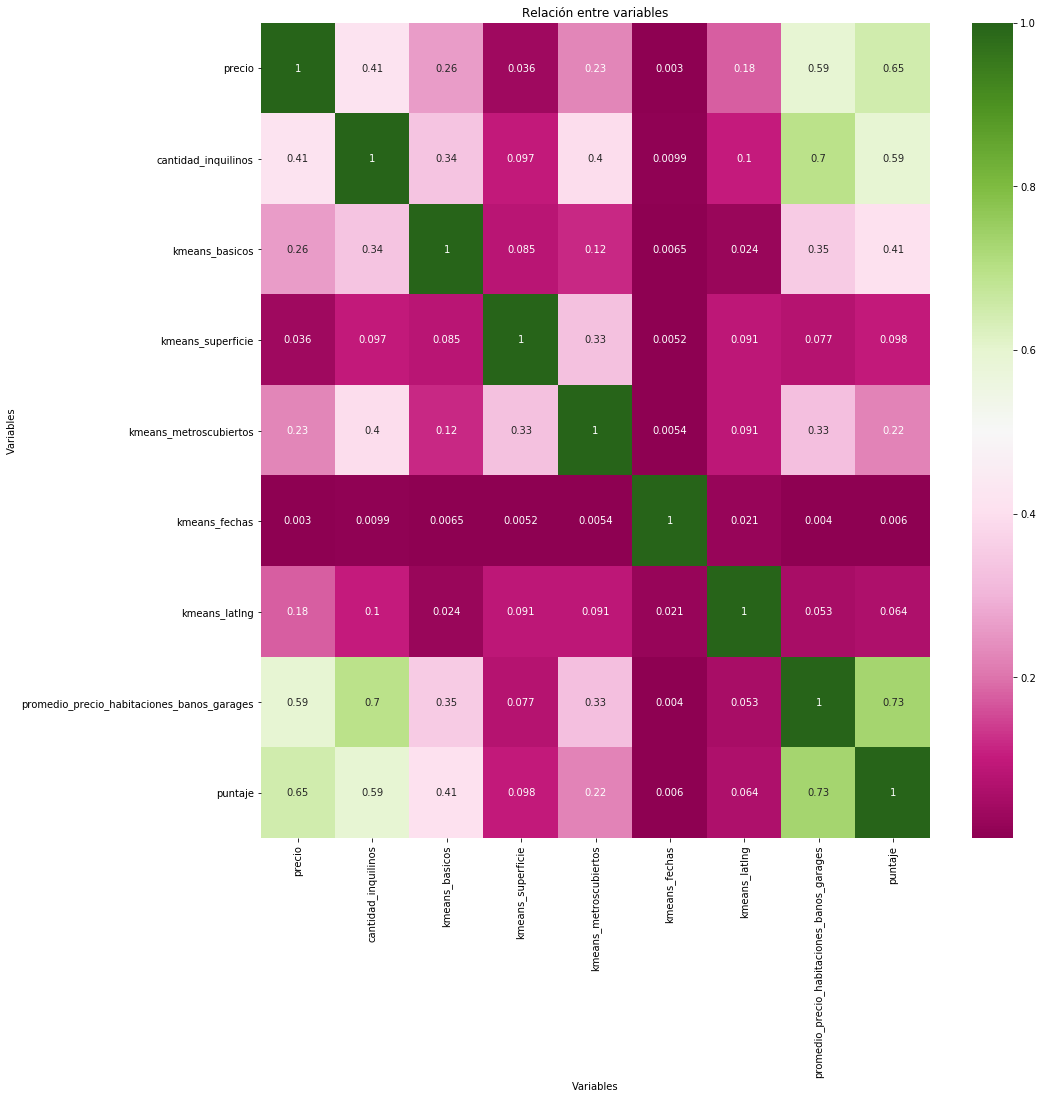

In [22]:
import matplotlib.pylab as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
cor = df_corr4.corr().abs()

sns.heatmap(cor,cmap='PiYG',  annot= True);
ax.axes.set_title("Relación entre variables")
ax.set_xlabel("Variables")
ax.set_ylabel("Variables")
ax.tick_params(labelsize=10)